<a href="https://colab.research.google.com/github/snehasanthosh29/TeamNewton_HackBio2021/blob/main/Copy_of_fc_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flow cytometry data - example analysis in R

In this tutorial, we are going to analyse a raw flow cytometry file collected for *Escherichia coli* growing in mGAM and stained with SYBR Green.

The following commands install the flowCore R package from BioConductor (this can take up to 15 minutes)

In [1]:
install.packages("BiocManager")
BiocManager::install("flowCore")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'flowCore'

also installing the dependencies ‘Rhdf5lib’, ‘Biobase’, ‘BiocGenerics’, ‘Rcpp’, ‘matrixStats’, ‘cytolib’, ‘S4Vectors’, ‘BH’, ‘RProtoBufLib’


Old packages: 'bit', 'bslib', 'curl', 'devtools', 'gargle', 'haven', 'highr',
  'isoband', 'openssl', 'ragg', 'roxygen2', 'scales', 'stringi', 'textshaping',
  'tinytex', 'whisker', 'boot', 'cluster', 'foreign', 'Matrix', 'nlme'



We can now load the flowCore library into R.

In [2]:
library(flowCore)

Next, we download the example fcs file.

In [3]:
fcsfile.url = "http://msysbiology.com/documents/tutorials/Escherichia_coli-mGAM.fcs"
temp_file = tempfile()
download.file(fcsfile.url, temp_file)

Now we can parse the downloaded fcs file with flowCore's read.FCS function.

In [4]:
fcdata=read.FCS(temp_file)

The summary commmand displays some properties of the fcsdata object.

In [5]:
summary(fcdata)

,FSC-A,SSC-A,FL1-A,FL2-A,FL3-A,FL4-A,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL4-H,Width,Time
Min.,0.00,0.000,3371.00,1417.000,135.000,0.0000,0.00,0.00,4132.00,2001.000,77.000,0.0000,17.0000,155.000
1st Qu.,7190.75,968.000,25680.50,3306.500,1230.000,0.0000,17116.50,3496.75,28139.75,3437.250,1248.000,298.0000,28.0000,208.000
Median,13237.00,1740.500,45731.50,5415.500,2004.000,154.0000,27501.00,4877.50,46996.50,5410.500,1941.000,570.0000,33.0000,260.000
Mean,18672.19,7947.076,77252.37,9802.704,4834.239,331.8386,34184.15,11830.78,74187.70,9132.858,4240.651,752.4104,35.8252,260.421
3rd Qu.,21371.00,3687.000,89486.50,10674.750,4081.750,486.0000,40851.75,7781.00,86651.75,10117.250,3924.250,964.0000,41.0000,313.000
Max.,2162771.00,9299935.000,1319867.00,408066.000,628994.000,11822.0000,2803939.00,3716801.00,1162879.00,243548.000,371991.000,13254.0000,142.0000,366.000


fcdata is an instance of the flowFrame class (an S4 class in R). Several flowFrame objects can be grouped into a flowSet. The following command lists available description fields:

In [6]:
names(fcdata@description)

[1] "FCSversion"            "$FIL"                  "$SMNO"                
  [4] "#SAMPLE"               "$DATATYPE"             "$MODE"                
  [7] "$BYTEORD"              "$NEXTDATA"             "$PAR"                 
 [10] "$P1B"                  "$P2B"                  "$P3B"                 
 [13] "$P4B"                  "$P5B"                  "$P6B"                 
 [16] "$P7B"                  "$P8B"                  "$P9B"                 
 [19] "$P10B"                 "$P11B"                 "$P12B"                
 [22] "$P13B"                 "$P14B"                 "$P1R"                 
 [25] "$P2R"                  "$P3R"                  "$P4R"                 
 [28] "$P5R"                  "$P6R"                  "$P7R"                 
 [31] "$P8R"                  "$P9R"                  "$P10R"                
 [34] "$P11R"                 "$P12R"                 "$P13R"                
 [37] "$P14R"                 "$P1N"                  "$P2N"                 
 [40] "$P3N"                  "$P4N"                  "$P5N"                 
 [43] "$P6N"                  "$P7N"                  "$P8N"                 
 [46] "$P9N"                  "$P10N"                 "$P11N"                
 [49] "$P12N"                 "$P13N"                 "$P14N"                
 [52] "$P1E"                  "#BDACCURIDECADES1"     "$P2E"                 
 [55] "#BDACCURIDECADES2"     "$P3E"                  "#BDACCURIDECADES3"    
 [58] "$P4E"                  "#BDACCURIDECADES4"     "$P5E"                 
 [61] "#BDACCURIDECADES5"     "$P6E"                  "#BDACCURIDECADES6"    
 [64] "$P7E"                  "#BDACCURIDECADES7"     "$P8E"                 
 [67] "#BDACCURIDECADES8"     "$P9E"                  "#BDACCURIDECADES9"    
 [70] "$P10E"                 "#BDACCURIDECADES10"    "$P11E"                
 [73] "#BDACCURIDECADES11"    "$P12E"                 "#BDACCURIDECADES12"   
 [76] "$P13E"                 "#BDACCURIDECADES13"    "$P14E"                
 [79] "#BDACCURIDECADES14"    "$P1S"                  "$P2S"                 
 [82] "$P3S"                  "$P4S"                  "$P5S"                 
 [85] "$P6S"                  "$P7S"                  "$P8S"                 
 [88] "$P9S"                  "$P10S"                 "$P11S"                
 [91] "$P12S"                 "$P13S"                 "$P14S"                
 [94] "#P1VirtualGain"        "#P2VirtualGain"        "#P3VirtualGain"       
 [97] "#P4VirtualGain"        "#P5VirtualGain"        "#P6VirtualGain"       
[100] "#P7VirtualGain"        "#P8VirtualGain"        "#P9VirtualGain"       
[103] "#P10VirtualGain"       "#P11VirtualGain"       "#P12VirtualGain"      
[106] "#P13VirtualGain"       "#P14VirtualGain"       "$TOT"                 
[109] "$DATE"                 "$CYT"                  "#BDACCURI4COLORCOMP"  
[112] "#LASERCONFIGURATION"   "$SPILLOVER"            "#BDACCURICAPTUREDDATE"
[115] "$TIMESTEP"             "$PROJ"                 "$BTIM"                
[118] "$ETIM"                 "#ATIM"                 "#ACQUISITIONTIMEMILLI"
[121] "$VOL"                  "$BEGINSTEXT"           "$ENDSTEXT"            
[124] "$BEGINDATA"            "$ENDDATA"              "$BEGINANALYSIS"       
[127] "$ENDANALYSIS"          "#SPACERS"              "FILENAME"             
[130] "transformation"        "flowCore_$P1Rmax"      "flowCore_$P1Rmin"     
[133] "flowCore_$P2Rmax"      "flowCore_$P2Rmin"      "flowCore_$P3Rmax"     
[136] "flowCore_$P3Rmin"      "flowCore_$P4Rmax"      "flowCore_$P4Rmin"     
[139] "flowCore_$P5Rmax"      "flowCore_$P5Rmin"      "flowCore_$P6Rmax"     
[142] "flowCore_$P6Rmin"      "flowCore_$P7Rmax"      "flowCore_$P7Rmin"     
[145] "flowCore_$P8Rmax"      "flowCore_$P8Rmin"      "flowCore_$P9Rmax"     
[148] "flowCore_$P9Rmin"      "flowCore_$P10Rmax"     "flowCore_$P10Rmin"    
[151] "flowCore_$P11Rmax"     "flowCore_$P11Rmin"     "flowCore_$P12Rmax"    
[154] "flowCore_$P12Rmin

The command below prints information about the laser configuration. The dollar sign is R's way to access the value of a named list element. The apostrophes are required because of the special character in the name of the list element, namely #.

In [7]:
fcdata@description$`#LASERCONFIGURATION`

[1] "3 Blue 1 Red"

<font color='red'>Task 1:</font> find out on which flow cytometer the data were generated. You can insert your code in the field below, click the field to select it and execute the code in it with 'Run'. Hint: the '$CYT' element in the list of descriptions encodes the flow cytometer.

In [34]:
fcdata@description$`$CYT`
fcdata@description$`$SPILLOVER`

[1] "BD Accuri C6"

3,4,5,6,9,10,11,12
1,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0
0,0,1,0,0,0,0,0
0,0,0,1,0,0,0,0
0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0
0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,1


The 'exprs' object contains the matrix with the measurements (here 5000 events with 14 parameters)

In [9]:
dim(fcdata@exprs)

[1] 5000   14

For convenience, we save this object as an R matrix called 'counts'.

In [10]:
counts=fcdata@exprs

Next, we will do a log transformation such that very high intensities are not dominating the analysis. For this, we first need to treat zero values to avoid infinities.

In [11]:
zeros=which(counts==0,arr.ind = TRUE)

We set all zeros to a pseudocount of 1 and then apply the log transformation. By default, log is the natural logarithm in R.

In [12]:
counts[zeros]=1
counts=log(counts)

Note that you can also use flowCore's own transformation function for this, for instance using transform(fcdata,logFSCH=log(\`FSC-H\`),logSSCH=log(\`SSC-H\`)), which would store log-transformed counts in new channels named logFSCH and logSSCH. In this case, the transform function handles zero values for you.

Then, we can use basic R plotting functionality to study the scatter plots. Here is for instance one between forward scatter area and side scatter area.

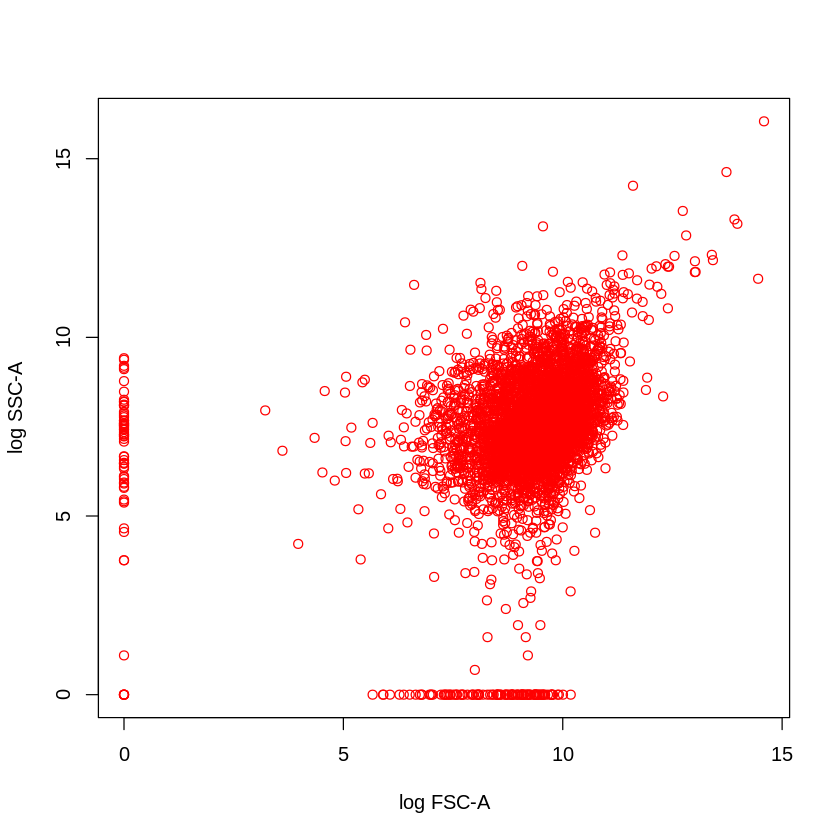

In [32]:
plot(counts[,1],counts[,2],xlab=paste("log",colnames(counts)[1]),ylab=paste("log",colnames(counts)[2]), col='red')

<font color="red">Task 2:</font> Plot the scatter plot for forward scatter area and forward scatter height to check whether doublets occurred. Hint: you can list parameter names in the count matrix with colnames(counts).

$P1N    $P2N    $P3N    $P4N    $P5N    $P6N    $P7N    $P8N    $P9N   $P10N 
"FSC-A" "SSC-A" "FL1-A" "FL2-A" "FL3-A" "FL4-A" "FSC-H" "SSC-H" "FL1-H" "FL2-H" 
  $P11N   $P12N   $P13N   $P14N 
"FL3-H" "FL4-H" "Width"  "Time"

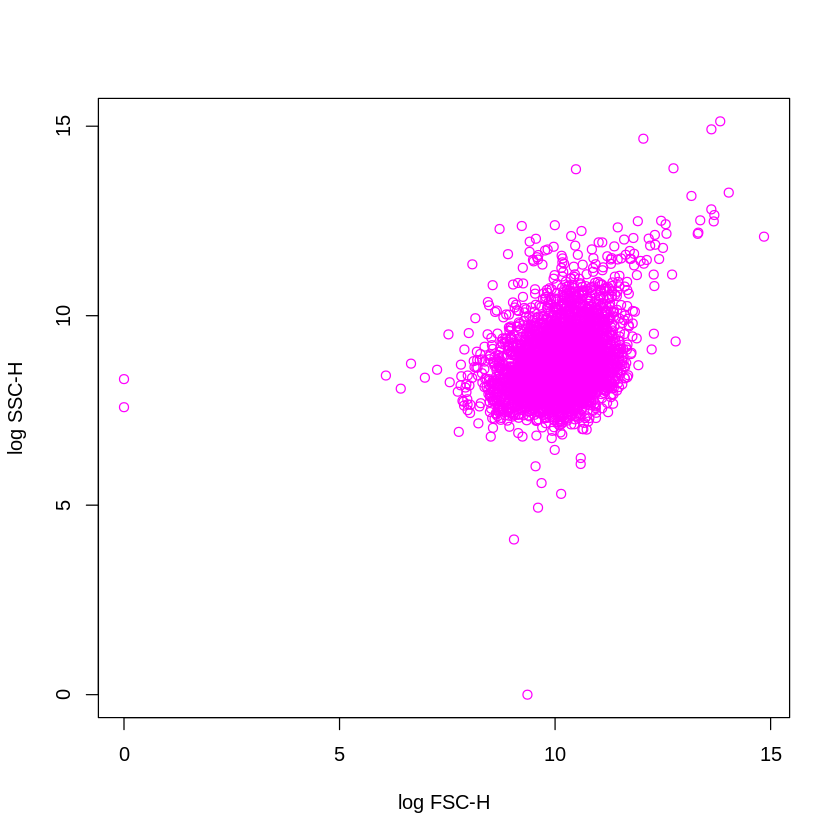

In [30]:
colnames(counts)
plot(counts[,7],counts[,8],xlab=paste("log",colnames(counts)[7]),ylab=paste("log",colnames(counts)[8]), col='magenta')

Given the above plots, how would you gate this flow cytometry data set?

Here is how you can implement a simple rectangle filter with flowCore using side scatter and forward scatter to remove debris. The thresholds are selected manually by looking at the log FSC-A/log SSC-A scatter plot.

In [15]:
fcdatap=fcdata
fcdatap@exprs=counts
rg = rectangleGate("FSC-A"=c(5,15), "SSC-A"=c(3,12), filterId="rectangle")
out=filter(fcdatap,rg)
out@filterDetails

$rectangle
$rectangle$filter
Rectangular gate 'rectangle' with dimensions:
  FSC-A: (5,15)
  SSC-A: (3,12)

$rectangle$parameters
  FSC-A   SSC-A 
"FSC-A" "SSC-A" 

$rectangle$populations
[1] "rectangle+" "rectangle-"



This is how the filtered FSC-A versus SSC-A scatter plot looks like:

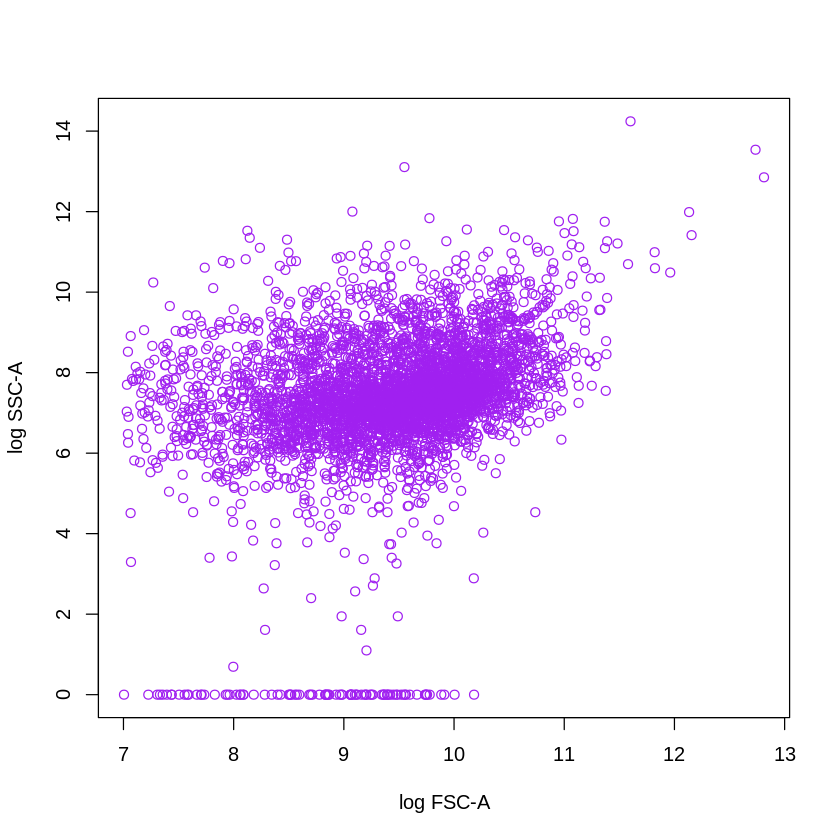

In [28]:
filtered=fcdatap@exprs[out@subSet,]
plot(filtered[,1],filtered[,2],xlab=paste("log",colnames(filtered)[1]),ylab=paste("log",colnames(filtered)[2]), col='purple')

<font color='red'>Task 3:</font> How many events remain after gating the raw fcs file with the thresholds defined above?

In [21]:
dim(fcdatap)
dim(filtered)
#Events remaining: 4793

events parameters 
      5000         14

[1] 4793   14

**You can do Scatter area vs scatter height for doublets findings**

You can try to filter on another parameter combination, e.g. FSC and the first fluorescence channel.

$rectangle
$rectangle$filter
Rectangular gate 'rectangle' with dimensions:
  FSC-A: (7,13)
  FL1-A: (8,12)

$rectangle$parameters
  FSC-A   FL1-A 
"FSC-A" "FL1-A" 

$rectangle$populations
[1] "rectangle+" "rectangle-"



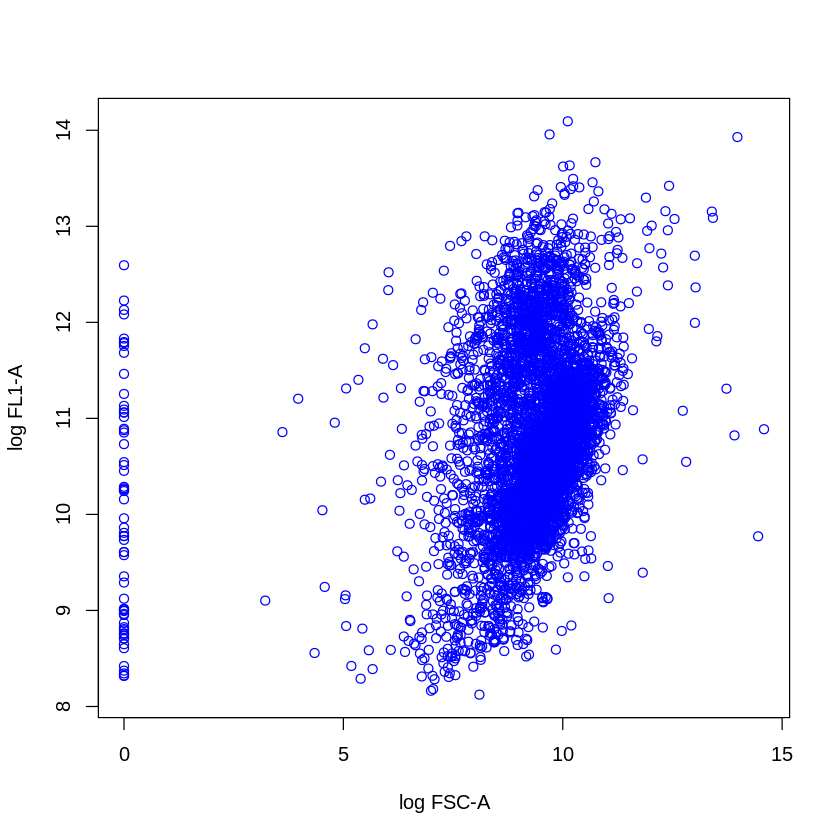

events parameters 
      5000         14

[1] 4247   14

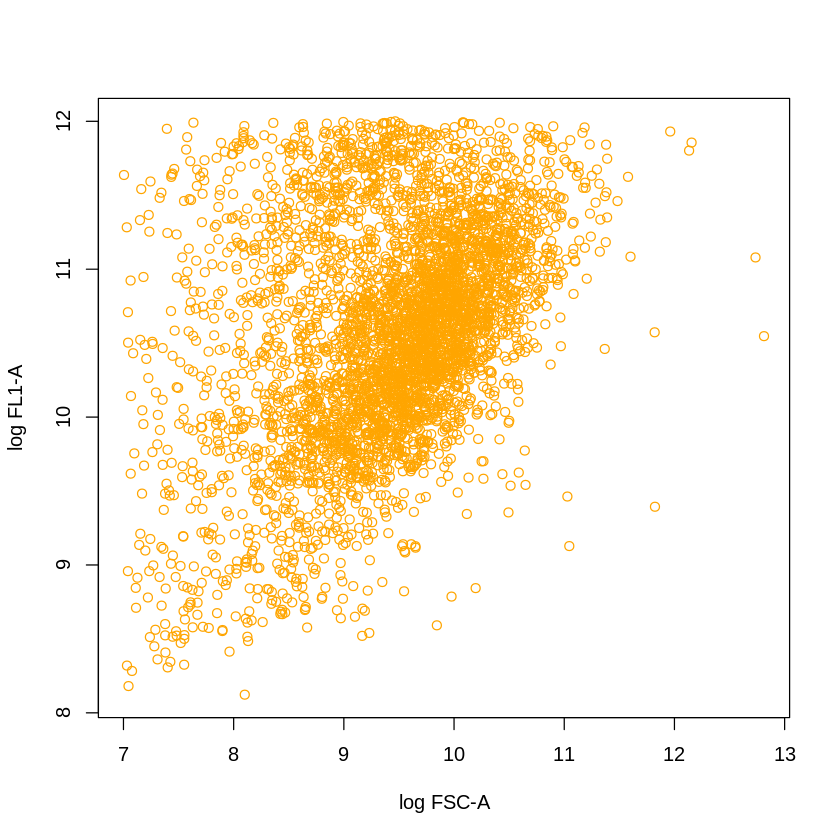

In [27]:
#First fluorescence channel: FL1-A
plot(counts[,1],counts[,3],xlab=paste("log",colnames(counts)[1]),ylab=paste("log",colnames(counts)[3]), col='blue')
fcdatap_2=fcdata
fcdatap_2@exprs=counts
rg = rectangleGate("FSC-A"=c(7,13), "FL1-A"=c(8,12), filterId="rectangle")
out=filter(fcdatap_2,rg)
out@filterDetails

filtered_2=fcdatap_2@exprs[out@subSet,]
plot(filtered_2[,1],filtered_2[,3],xlab=paste("log",colnames(filtered_2)[1]),ylab=paste("log",colnames(filtered_2)[3]), col='orange')
dim(fcdatap_2)
dim(filtered_2)
##events5000  parameters14
##4247    14

$P1N    $P2N    $P3N    $P4N    $P5N    $P6N    $P7N    $P8N    $P9N   $P10N 
"FSC-A" "SSC-A" "FL1-A" "FL2-A" "FL3-A" "FL4-A" "FSC-H" "SSC-H" "FL1-H" "FL2-H" 
  $P11N   $P12N   $P13N   $P14N 
"FL3-H" "FL4-H" "Width"  "Time"

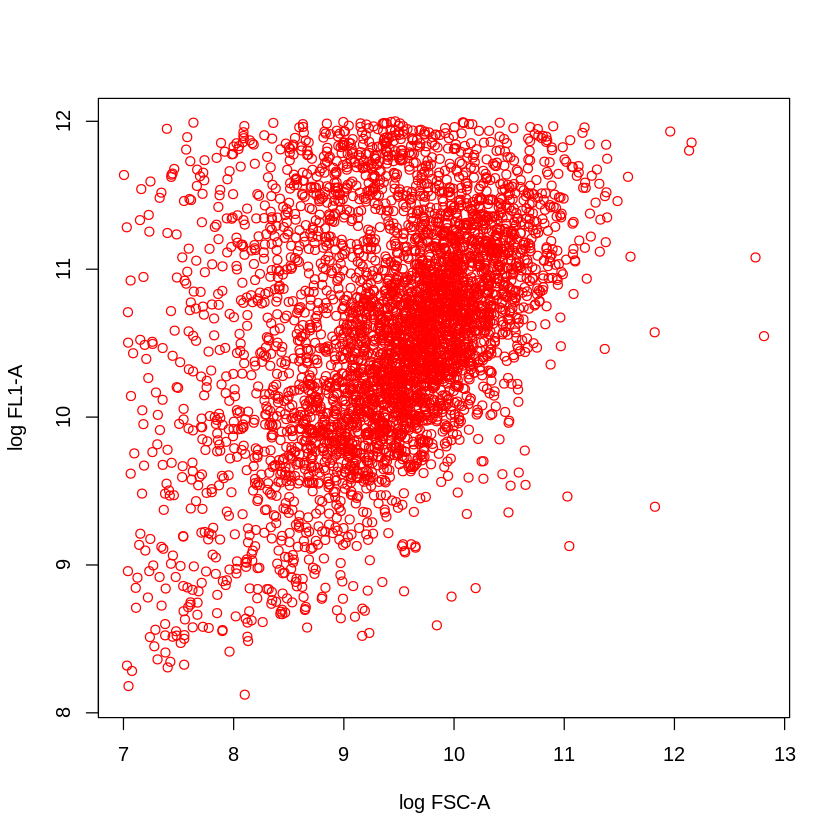

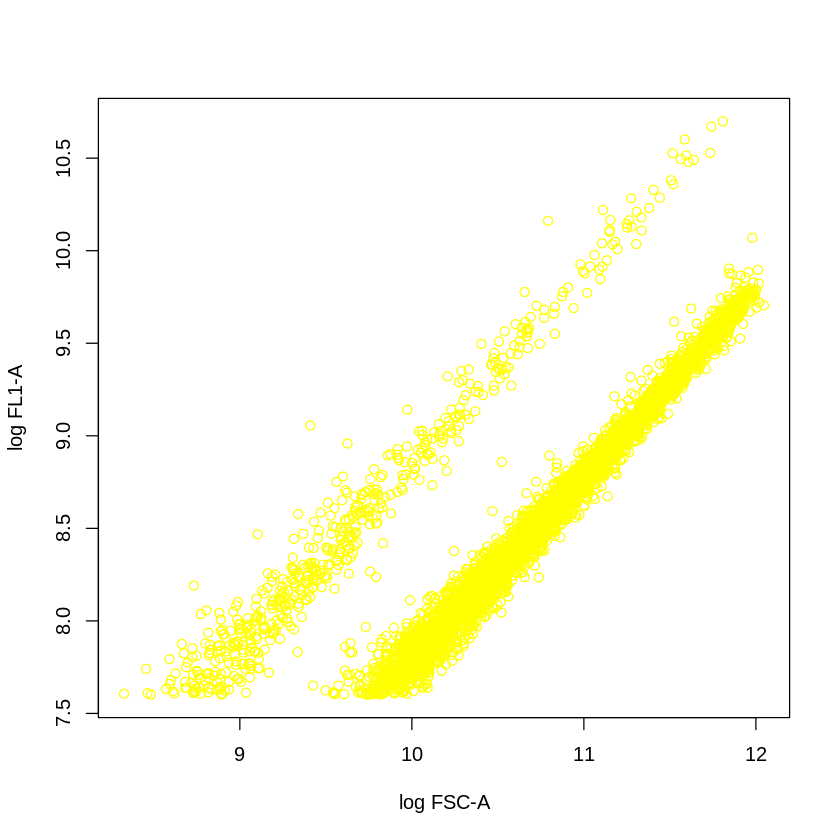

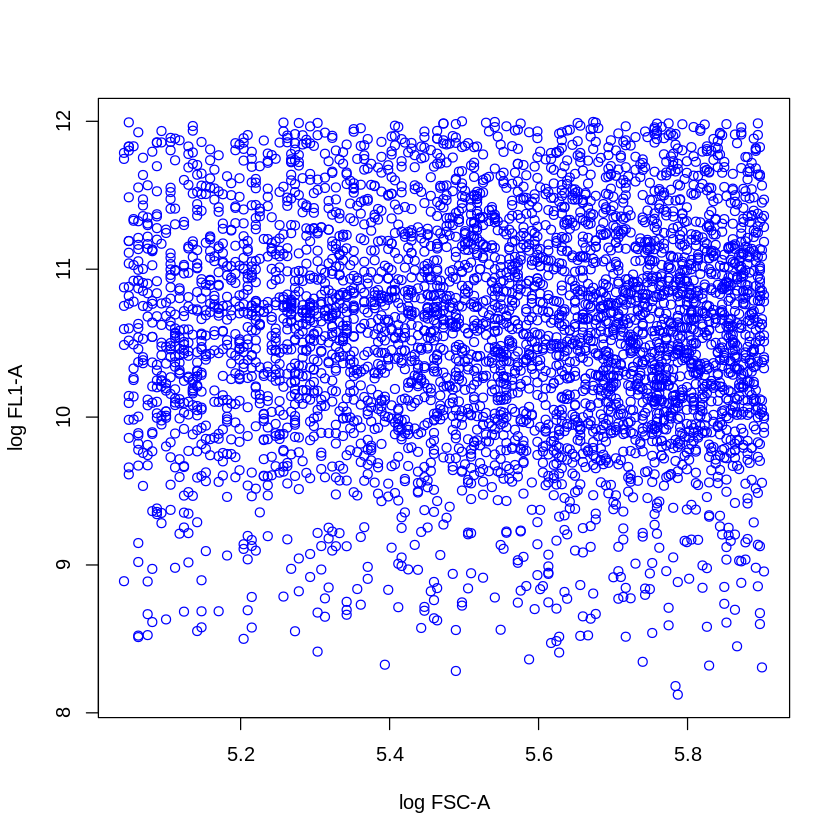

In [36]:
colnames(counts)
plot(filtered_2[,1],filtered_2[,3],xlab=paste("log",colnames(filtered_2)[1]),ylab=paste("log",colnames(filtered_2)[3]), col='red')
plot(filtered_2[,9],filtered_2[,10],xlab=paste("log",colnames(filtered_2)[1]),ylab=paste("log",colnames(filtered_2)[3]), col='yellow')
plot(filtered_2[,14],filtered_2[,3],xlab=paste("log",colnames(filtered_2)[1]),ylab=paste("log",colnames(filtered_2)[3]), col='blue')

Finally, we can also plot histograms to look at the distribution of values for a single parameter across cells. For instance, below is the distribution for the area of the first fluorescence channel.

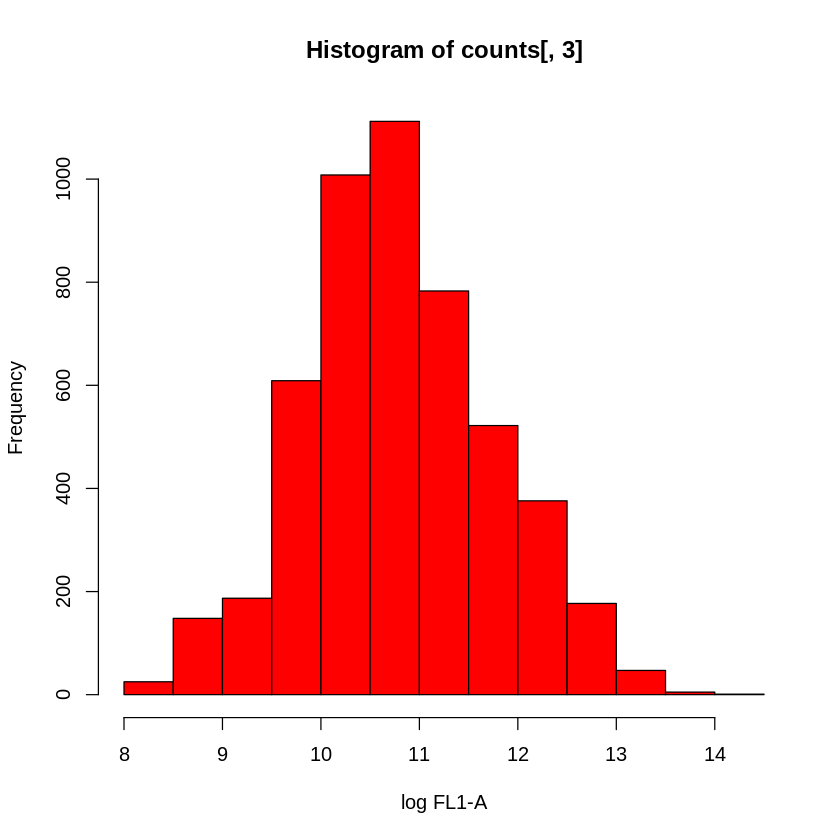

In [26]:
hist(counts[,3],xlab=paste("log",colnames(counts)[3]), col='red')

You can generate much more beautiful plots with additional R libraries, such as [ggcyto](https://bioconductor.org/packages/release/bioc/html/ggcyto.html). This tutorial only covered the basics to get you started.